# Importing Libraries

In [ ]:
import sys
print(sys.executable)
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
import os
import shutil
from PIL import Image
import time
from tqdm import tqdm
import random
from PIL import ImageFilter
import os
import torch
import torchvision.transforms as transforms

/usr/bin/python3


# Extracting the Streetview Images Dataset

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install kagglehub[hf-datasets]


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
path = kagglehub.dataset_download("paulchambaz/google-street-view")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'google-street-view' dataset.
Path to dataset files: /kaggle/input/google-street-view


In [ ]:
data_path = "/root/.cache/kagglehub/datasets/paulchambaz/google-street-view/versions/1"
files = os.listdir(data_path)
print("Files in dataset directory:", files)

Files in dataset directory: ['dataset']


In [ ]:
import os

data_path = "/root/.cache/kagglehub/datasets/paulchambaz/google-street-view/versions/1"
for root, dirs, files in os.walk(data_path):
    print(f"Directory: {root}")
    print("Subdirectories:", dirs)
    print("Files:", files)


Directory: /root/.cache/kagglehub/datasets/paulchambaz/google-street-view/versions/1
Subdirectories: ['dataset']
Files: []
Directory: /root/.cache/kagglehub/datasets/paulchambaz/google-street-view/versions/1/dataset
Subdirectories: []
Files: ['8985.png', '5043.png', '5190.png', '3218.png', '1910.png', '842.png', '8455.png', '5288.png', '9333.png', '3711.png', '1212.png', '7215.png', '6791.png', '7752.png', '8268.png', '3579.png', '6962.png', '1279.png', '6397.png', '2346.png', '5466.png', '6582.png', '1556.png', '2462.png', '3619.png', '1057.png', '1646.png', '8755.png', '9059.png', '7155.png', '5170.png', '2539.png', '8591.png', '2632.png', '6874.png', '5116.png', '2600.png', '59.png', '6850.png', '4850.png', '642.png', '8398.png', '2598.png', '1726.png', '1679.png', '1522.png', '6705.png', '8792.png', '322.png', '2362.png', '1964.png', '380.png', '1306.png', '4855.png', '6992.png', '6672.png', '1127.png', '3804.png', '6793.png', '5171.png', '8935.png', '1931.png', '8117.png', '5922.p

In [ ]:
image_files = [f for f in os.listdir(data_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

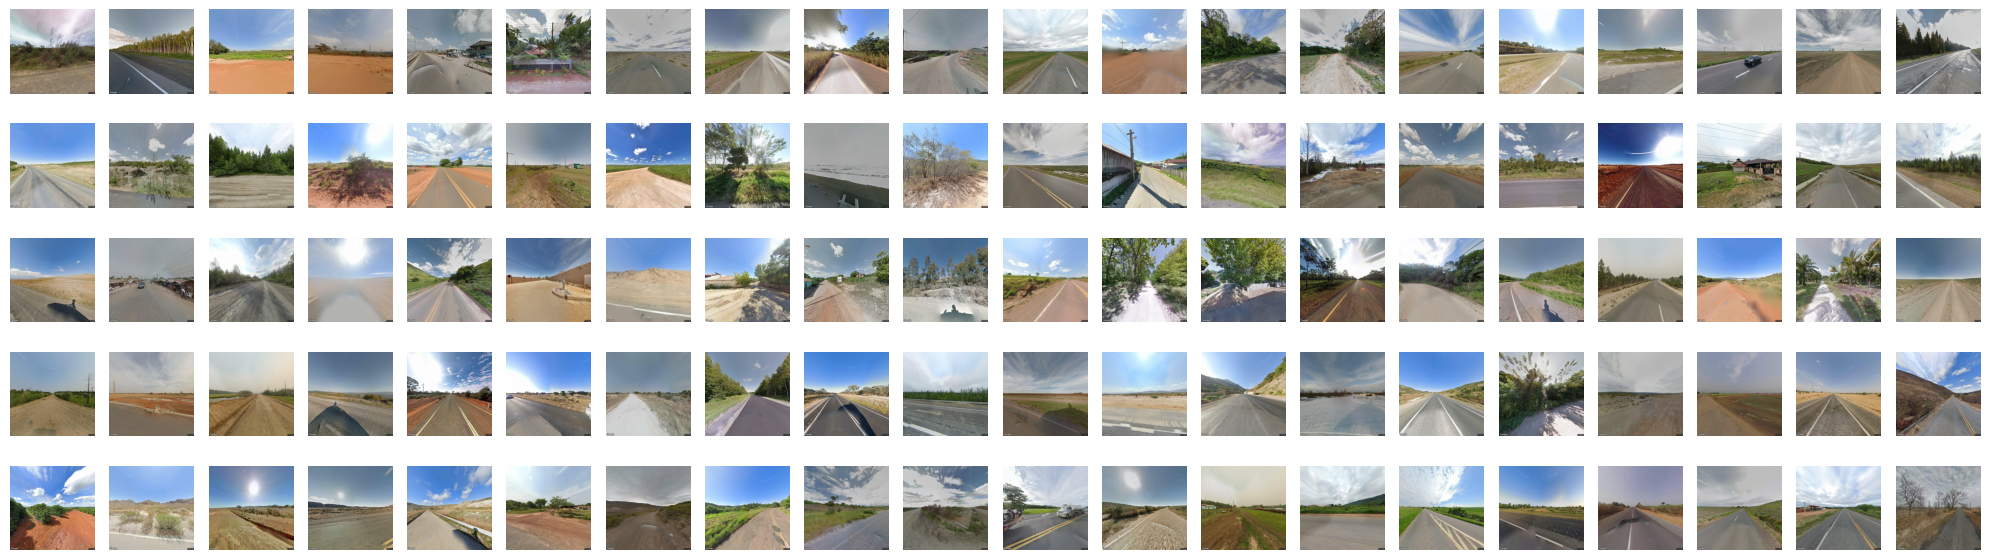

In [ ]:
image_dir = os.path.join(data_path, "dataset")

image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


files = image_files[:100]  # show up to 50 images

rows, cols = 5, 20
plt.figure(figsize=(20, 6))

for i, filename in enumerate(files):
    img_path = os.path.join(image_dir, filename)
    img = Image.open(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Resizing Images

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
source_dir = os.path.join(data_path, "dataset")   # existing folder with images
base_save_dir = "/content/drive/MyDrive/Thesis/Dataset"
train_dir = os.path.join(base_save_dir, "TrainA")
test_dir = os.path.join(base_save_dir, "TestA")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

def resize_and_save(files, target_dir):
    for filename in files:
        src_path = os.path.join(source_dir, filename)
        dst_path = os.path.join(target_dir, filename)
        try:
            img = Image.open(src_path).resize((256, 256), Image.Resampling.LANCZOS)
            img.save(dst_path)
        except Exception as e:
            print(f"⚠️ Error processing {filename}: {e}")

resize_and_save(train_files, train_dir)
resize_and_save(test_files, test_dir)

print("✅ Done!")
print(f"Training images saved to: {train_dir}")
print(f"Testing images saved to: {test_dir}")


✅ Done!
Training images saved to: /content/drive/MyDrive/Thesis/Dataset/TrainA
Testing images saved to: /content/drive/MyDrive/Thesis/Dataset/TestA


In [ ]:
import os

folder_path = "/content/drive/MyDrive/Thesis/Dataset/TestA"

files = os.listdir(folder_path)
print("Total files:", len(files))

Total files: 2000


# Adding Sand Effect to Dataset

In [ ]:
def sand_effect(image):
    try:
        img_array = np.asarray(image).astype(np.float32) / 255.0
        h, w = img_array.shape[:2]
        output = np.copy(img_array)

        var = random.uniform(0.01, 0.01)
        noise = np.random.normal(0, var**0.5, (h, w, 3))
        output += noise
        output = np.clip(output, 0, 1)

        brown_tints = [
            np.array([0.8, 0.65, 0.3]),              # Hex: #CCA64D   – Sand yellow / Light dusty sand
            np.array([0.63137, 0.2902, 0.06275]),    # Hex: #A14A10 – Rusty sand / Dusty reddish brown
            np.array([0.77647, 0.52157, 0.23922]),   # Hex: #C5863D – Dusty tan / Sandstone
            np.array([0.95, 0.8, 0.4]),              # Hex: #F2CC66   – Pale sand / Light sandy beige
            np.array([0.85, 0.65, 0.25]),            # Hex: #D9A640   – Golden sand / Rich sandy gold
            np.array([0.65, 0.45, 0.1]),             # Hex: #A6731A   – Earthy sand / Brownish dust
            np.array([0.6, 0.4, 0.05])               # Hex: #99660D   – Dark sand / Dusty ochre
        ]
        brown_tint = random.choice(brown_tints)
        tint_strength = random.uniform(0.4, 0.9)
        output = output * (1 - tint_strength) + brown_tint * tint_strength
        output = np.clip(output, 0, 1)

        img = Image.fromarray((output * 255).astype(np.uint8))

        if random.random() < 0.7:
            blur_radius = random.uniform(0.1, 1.5)
            img = img.filter(ImageFilter.GaussianBlur(blur_radius))

        return img
    except Exception as e:
        print(f"Error applying sandstorm effect: {e}")
        return image


def process_images(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    for filename in tqdm(image_files, desc=f"Processing images in {input_folder}"):
        try:
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path).convert('RGB')
            noisy_img = sand_effect(img)

            out_path = os.path.join(output_folder, filename)
            noisy_img.save(out_path)
        except Exception as e:
            print(f"Error processing {filename}: {e}")


In [ ]:
process_images('/content/drive/MyDrive/Thesis/Dataset/TrainA', '/content/drive/MyDrive/Thesis/Dataset/TrainB')
process_images('/content/drive/MyDrive/Thesis/Dataset/TestA', '/content/drive/MyDrive/Thesis/Dataset/TestB')

Processing images in /content/drive/MyDrive/Thesis/Dataset/TrainA: 100%|██████████| 8000/8000 [06:50<00:00, 19.47it/s]
Processing images in /content/drive/MyDrive/Thesis/Dataset/TestA: 100%|██████████| 2000/2000 [01:38<00:00, 20.40it/s]


# Visualising Sand Degraded Images

In [ ]:
data_sand = '/content/drive/MyDrive/Thesis/Dataset/TestB'
images_sand = [f for f in os.listdir(data_sand) if f.endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
plt.figure(figsize=(30, 20))
for i in range(50):
    try:
        img_path = os.path.join(data_sand, images_sand[i])
        img = Image.open(img_path)

        plt.subplot(5, 10, i + 1)
        plt.imshow(img)
        plt.title(images_sand[i], fontsize=15)
        plt.axis('off')

    except Exception as e:
        print(f"Error loading {images_sand[i]}: {e}")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Merging Images to Prepare Dataset fro Pix2Pix Model

In [ ]:
import os
from PIL import Image
from tqdm import tqdm
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image

def merge_images_gpu(source_dir1, source_dir2, dest_dir):
    os.makedirs(dest_dir, exist_ok=True)
    common_files = sorted(set(os.listdir(source_dir1)) & set(os.listdir(source_dir2)))

    to_tensor = transforms.ToTensor()
    to_pil = transforms.ToPILImage()

    for filename in tqdm(common_files, desc=f"Merging (GPU) into {os.path.basename(dest_dir)}"):
        path1 = os.path.join(source_dir1, filename)
        path2 = os.path.join(source_dir2, filename)

        try:
            img1 = Image.open(path1).convert("RGB")
            img2 = Image.open(path2).convert("RGB")

            if img1.size != img2.size:
                img2 = img2.resize(img1.size)

            # Convert to tensors and send to GPU
            t1 = to_tensor(img1).cuda()
            t2 = to_tensor(img2).cuda()

            # Concatenate along width (dim=2)
            merged_tensor = torch.cat((t1, t2), dim=2)

            # Save as image (move to CPU first)
            save_path = os.path.join(dest_dir, filename)
            save_image(merged_tensor.cpu(), save_path)

        except Exception as e:
            print(f"Error processing {filename}: {e}")


In [ ]:
merge_images_gpu(
    "/content/drive/MyDrive/Thesis/Dataset/TrainA",
    "/content/drive/MyDrive/Thesis/Dataset/TrainB",
    "/content/drive/MyDrive/Thesis/Dataset/Train"
)

merge_images_gpu(
    "/content/drive/MyDrive/Thesis/Dataset/TestA",
    "/content/drive/MyDrive/Thesis/Dataset/TestB",
    "/content/drive/MyDrive/Thesis/Dataset/Test"
)

Merging (GPU) into Test: 100%|██████████| 2000/2000 [29:46<00:00,  1.12it/s]


In [ ]:
data = '/content/drive/MyDrive/Thesis/Dataset/Train'
images = [f for f in os.listdir(data) if f.endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
plt.figure(figsize=(50, 30))
for i in range(20):
    try:
        img_path = os.path.join(data, images[i])
        img = Image.open(img_path)

        plt.subplot(4, 5, i + 1)
        plt.imshow(img)
        plt.title(images[i], fontsize=15)
        plt.axis('off')

    except Exception as e:
        print(f"Error loading {images[i]}: {e}")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.